In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pathlib 
import sys
import os 
import matplotlib.patches as patches


sys.path.append("..")

In [30]:
dataset_root = pathlib.Path("/home/Data/CBIS-DDSM-segmentation-2240x1792")
images_dir = dataset_root / 'images'
masks_dir = dataset_root / 'masks'
bb = dataset_root / 'bounding_boxes.csv'
bounding_boxes = pd.read_csv(bb)
#bounding_boxes.groupby("id")        
print(len(bounding_boxes))

# Para saber cuantas imágenes y máscaras hay en el dataset
images = os.listdir(images_dir)  
masks = os.listdir(masks_dir)
print(len(images), len(masks))


3209
2772 2772


In [31]:
# No hay las mismas bounding boxes que imágenes porque algunas de las imágenes tienen más de una bounding box, debemos hacer el groupby
# Primero observamos cómo son los elementos de bounding_boxes
print(bounding_boxes.head())

                 id     x     y    w    h                    label  group
0  P_00474_LEFT_MLO  1161   940  556  458  CALCIFICATION_MALIGNANT  train
1   P_00476_LEFT_CC  1085  1556   18   28     CALCIFICATION_BENIGN  train
2  P_00476_LEFT_MLO  1050  1637   28   42     CALCIFICATION_BENIGN  train
3  P_00476_RIGHT_CC  1672  1460   22   19     CALCIFICATION_BENIGN  train
4  P_00476_RIGHT_CC  1654  1680   25   19     CALCIFICATION_BENIGN  train


In [32]:
# Agrupamos por etiqueta id, de manera que todas las bb correspondientes a la misma imagen quedarán juntas, 
# así deberíamos tener el mismo número de bounding boxes que de imágenes
bounding_boxes_grouped = bounding_boxes.groupby("id")
print(len(bounding_boxes_grouped), len(images), len(masks))



2772 2772 2772


In [33]:
# Observamos cómo son los elementos de bounding_boxes_grouped
print(bounding_boxes_grouped.head())
print(bounding_boxes_grouped.get_group("P_00476_RIGHT_CC"))


                     id     x     y    w    h                    label  group
0      P_00474_LEFT_MLO  1161   940  556  458  CALCIFICATION_MALIGNANT  train
1       P_00476_LEFT_CC  1085  1556   18   28     CALCIFICATION_BENIGN  train
2      P_00476_LEFT_MLO  1050  1637   28   42     CALCIFICATION_BENIGN  train
3      P_00476_RIGHT_CC  1672  1460   22   19     CALCIFICATION_BENIGN  train
4      P_00476_RIGHT_CC  1654  1680   25   19     CALCIFICATION_BENIGN  train
...                 ...   ...   ...  ...  ...                      ...    ...
3204  P_01825_RIGHT_MLO  1512  1460  124  112              MASS_BENIGN   test
3205  P_01833_RIGHT_MLO  1127   796  300  220           MASS_MALIGNANT   test
3206   P_01865_LEFT_MLO  1198  1332  239   79           MASS_MALIGNANT   test
3207   P_01912_RIGHT_CC  1347  1144  324  230           MASS_MALIGNANT   test
3208  P_01912_RIGHT_MLO  1182  1116  261  142           MASS_MALIGNANT   test

[3200 rows x 7 columns]
                 id     x     y   w   h

In [34]:

def plot_bounding_boxes(group_df):
    
    """
    Función para iterar sobre las filas de un DataFrame y dibujar rectángulos.
    
    Parameters:
    group_df (DataFrame): DataFrame de un grupo específico.
    """
    # Iterar sobre las filas del DataFrame
    for index, row in group_df.iterrows():
        # Obtener los valores de las columnas
        x = row['x']
        y = row['y']
        w = row['w']
        h = row['h']
        
        xmin = x
        ymin = y
        xmax = x + w
        ymax = y + h

        
        # Dibujar el rectángulo
        plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'r')

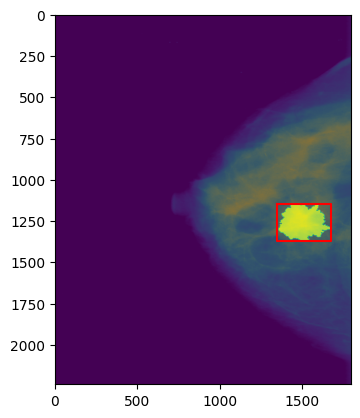

In [35]:
# Vemos si funciona con una imagen debajo y con la máscara

group_df = bounding_boxes_grouped.get_group("P_01912_RIGHT_CC")

# Cargar imagen
imagen = plt.imread(images_dir / "P_01912_RIGHT_CC.png")
mascara = plt.imread(masks_dir / "P_01912_RIGHT_CC.png")


# Dibujar un rectángulo en la imagen
plt.imshow(imagen)
plot_bounding_boxes(group_df)
plt.imshow(mascara, alpha=0.5)

plt.show()



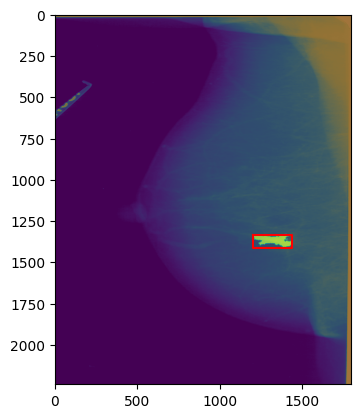

In [36]:
# Vemos si funciona con una imagen debajo y con la máscara

group_df = bounding_boxes_grouped.get_group("P_01865_LEFT_MLO")

# Cargar imagen
imagen = plt.imread(images_dir / "P_01865_LEFT_MLO.png")
mascara = plt.imread(masks_dir / "P_01865_LEFT_MLO.png")


# Dibujar un rectángulo en la imagen
plt.imshow(imagen)
plot_bounding_boxes(group_df)
plt.imshow(mascara, alpha=0.5)

plt.show()


In [37]:
# FILTRADO. ¿Qué grupos tienen más de una bounding box? --> Para comprobar si el plot va con esos grupos

filtered_groups = bounding_boxes_grouped.filter(lambda x: len(x) > 1)
print(filtered_groups)

filtered_groups = filtered_groups.groupby("id")


                     id     x     y    w    h                 label  group
3      P_00476_RIGHT_CC  1672  1460   22   19  CALCIFICATION_BENIGN  train
4      P_00476_RIGHT_CC  1654  1680   25   19  CALCIFICATION_BENIGN  train
5      P_00476_RIGHT_CC  1470  1413   14   19  CALCIFICATION_BENIGN  train
6     P_00476_RIGHT_MLO  1660   972   43   28  CALCIFICATION_BENIGN  train
7     P_00476_RIGHT_MLO  1308   857   32   31  CALCIFICATION_BENIGN  train
...                 ...   ...   ...  ...  ...                   ...    ...
3144   P_01566_RIGHT_CC  1530   449  138  111           MASS_BENIGN   test
3145   P_01566_RIGHT_CC  1144   646  145  133           MASS_BENIGN   test
3146  P_01566_RIGHT_MLO  1249   493  119  120           MASS_BENIGN   test
3147  P_01566_RIGHT_MLO   870   860  105  117           MASS_BENIGN   test
3148  P_01566_RIGHT_MLO   797  1156  141  152           MASS_BENIGN   test

[719 rows x 7 columns]


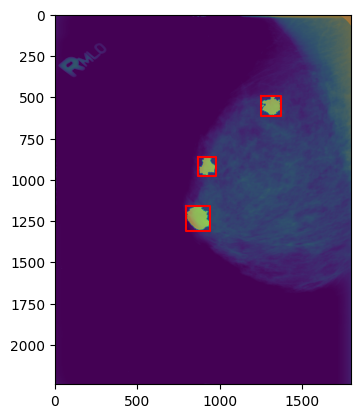

In [38]:
group_df = filtered_groups.get_group("P_01566_RIGHT_MLO")

# Cargar imagen
imagen = plt.imread(images_dir / "P_01566_RIGHT_MLO.png")
mascara = plt.imread(masks_dir / "P_01566_RIGHT_MLO.png")


# Dibujar un rectángulo en la imagen
plt.imshow(imagen)
plot_bounding_boxes(group_df)
plt.imshow(mascara, alpha=0.5)

plt.show()


In [39]:
def plot_bounding_boxes_mejorada(id_imagen):
    """
    Función para iterar sobre las filas de un DataFrame y dibujar rectángulos.
    
    Parameters:
    group_df (DataFrame): DataFrame de un grupo específico.
    """


    nombre_img = f"{id_imagen}.png"  # Concatenar la extensión
    group_df = bounding_boxes_grouped.get_group(id_imagen)
    imagen = plt.imread(images_dir / nombre_img)
    mascara = plt.imread(masks_dir / nombre_img)


    # Dibujar un rectángulo en la imagen
    plt.imshow(imagen)

    # Iterar sobre las filas del DataFrame
    for index, row in group_df.iterrows():
        # Obtener los valores de las columnas
        x = row['x']
        y = row['y']
        w = row['w']
        h = row['h']
        
        xmin = x
        ymin = y
        xmax = x + w
        ymax = y + h

        
        # Dibujar el rectángulo
        plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'r')
    
    plt.imshow(mascara, alpha=0.5)

    plt.show()
    

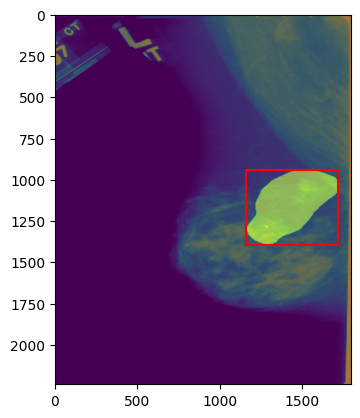

In [40]:
id_imagen = "P_00474_LEFT_MLO"
plot_bounding_boxes_mejorada(id_imagen)